 
#  Task 1: Preduction Using Supervised Machine Learning

### Problem: Predict CO2_Emmision(g/km) based on Engine size (L)

### Name: Ankita Dinesh kumbhar

In [1]:
# importing important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv file
data=pd.read_csv("f:\\CO2 Emissions_Canada.csv")

In [3]:
# getting the information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
# Getting the statistical information
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [5]:
# See the first five rows of the data
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
# checking the null values in the data
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

###  Plotting the scatterplot Between the Engine Size(independent variable) and CO2_Emission (Dependent variable)

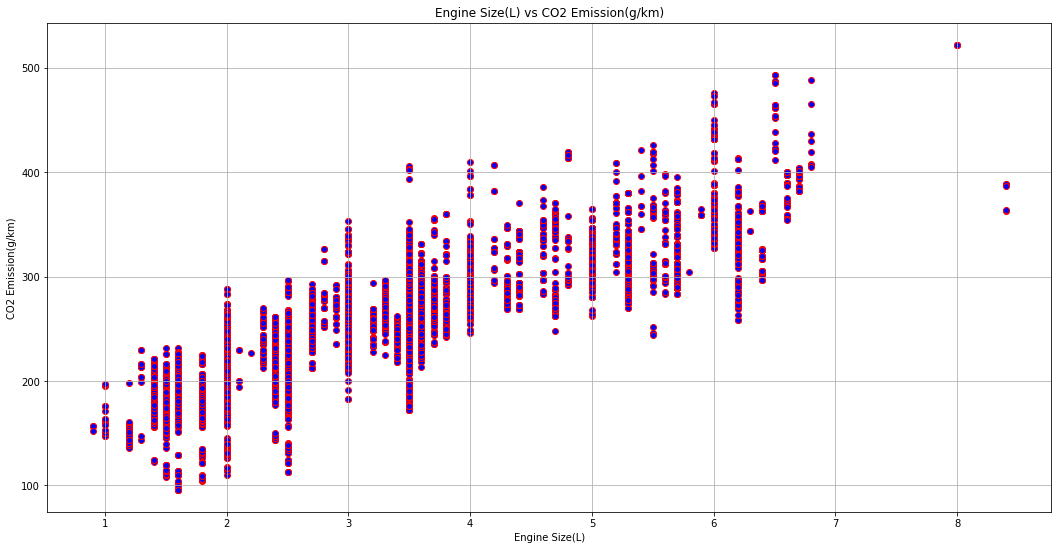

In [8]:
plt.figure(figsize=(18,9))            
plt.scatter(x=data["Engine Size(L)"],y=data["CO2 Emissions(g/km)"],c="blue",edgecolors="red")
plt.title("Engine Size(L) vs CO2 Emission(g/km)")
plt.xlabel("Engine Size(L)")
plt.ylabel("CO2 Emission(g/km)")
plt.grid()
plt.show()

In [9]:
#checking the relation between Engine Size and CO2 Emission by correlation spearman method
x1=data.iloc[:,3]
x2=data.iloc[:,-1]
c_data=pd.concat([x1,x2],axis=1)
c_data.corr(method="spearman")

,Engine Size(L),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.869129
CO2 Emissions(g/km),0.869129,1.000000


In [10]:
# Independent variable
x=data["Engine Size(L)"].values

In [11]:
# dependent variable
y=data["CO2 Emissions(g/km)"].values

In [12]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred=model.predict(x_test)

In [17]:
y_pred=pd.DataFrame(y_pred)
df=pd.DataFrame(y_test)
df1=pd.concat([y_pred,df],axis=1)
df1.columns=["predicted","Actual"]
df1

,predicted,Actual
0,244.630717,241
1,207.957399,229
2,273.969371,253
3,226.294058,183
4,244.630717,231
...,...,...
1842,222.626726,199
1843,207.957399,118
1844,339.981343,315
1845,255.632712,276


### Plotting the Regression line and datas

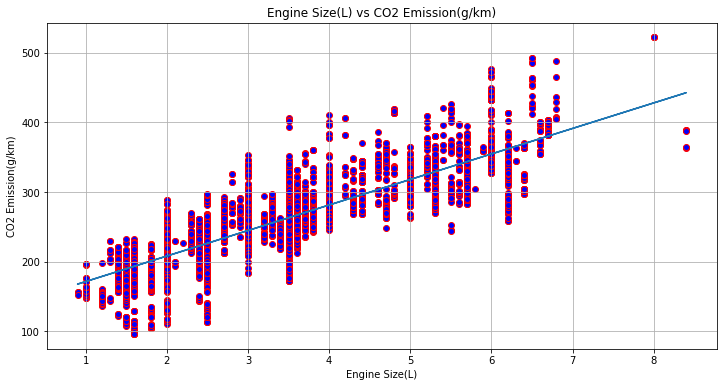

In [18]:
line= model.coef_*x+model.intercept_
plt.figure(figsize=(12,6))            
plt.scatter(x=data["Engine Size(L)"],y=data["CO2 Emissions(g/km)"],c="blue",edgecolors="red")
plt.plot(x,line)
plt.title("Engine Size(L) vs CO2 Emission(g/km)")
plt.xlabel("Engine Size(L)")
plt.ylabel("CO2 Emission(g/km)")
plt.grid()
plt.show()


In [19]:
print("Training_Score={}".format(model.score(x_train,y_train)))

Training_Score=0.7238653407342331


### Evaluating the Models

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

In [21]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y_test,y_pred)

In [22]:
print("Mean_Absolute_error={}".format(MAE))
print("\n")
print("Mean_Squared_Error={}".format(MSE))
print("\n")
print("Root_mean_squared_error={}".format(RMSE))
print("\n")
print(" r2_score={}".format(r2))

Mean_Absolute_error=23.278811916762233


Mean_Squared_Error=945.2285017501397


Root_mean_squared_error=30.744568654481718


 r2_score=0.7260943102240829
